<a href="https://colab.research.google.com/github/V31T/ML_INTRO_CS133/blob/main/Henry_CS133_Final_Spring_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spring 2024 CS 133 Final

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Question 1 (12 Points):

Read in all of the available data for the scientific tree species name (`namescientific`) and the neighborhood name (`name`) from the tree_tracker.db file.

Please reference the ERD visible here:
https://drive.google.com/file/d/1TYX2utHO2emExjYf5n7L8MHR74aliudr/view?usp=sharing

In [15]:
conn = sqlite3.connect('/content/tree_tracker.db')
data = pd.read_sql_query('Select * from tree;', conn)

data2 = pd.read_sql_query('Select * from neighborhood', conn)
data2.rename(columns = {'intid_neighborhood':'neighborhood_id'}, inplace = True)
data2

,neighborhood_id,name
0,1,Canoas Garden and Almaden
1,2,Gramercy and Alexander
2,3,Farm and Rubino Dr
3,4,Mayfair
4,5,Owsley
...,...,...
292,293,Coyote Creek
293,294,Rancho Santa Teresa Mobile Homes
294,295,Magic Sands Mobile Homes
295,296,Westfield Oakridge


In [20]:
df = pd.merge(data, data2,
how='inner', on='neighborhood_id')
df = df[['intid_tree', 'neighborhood_id', 'namescientific', 'name']]
df

,intid_tree,neighborhood_id,namescientific,name
0,28,180,Pistacia chinensis,Metcalf
1,160,180,Quercus frainetto,Metcalf
2,2885,180,Unknown,Metcalf
3,3535,180,Pinus canariensis,Metcalf
4,4064,180,Pinus canariensis,Metcalf
...,...,...,...,...
17892,539632,151,Alnus rhombifolia,Meadowlands
17893,542370,151,Stump,Meadowlands
17894,543552,151,Quercus agrifolia,Meadowlands
17895,516747,255,Stump,Riverbend/Golden Wheel/South Bay


# Question 1.1 (0 Points):

If you cannot read in the data from the .db database, read in the data using this url instead.
`https://docs.google.com/spreadsheets/d/1K3NykNue8kdzrtSBpAhaANNYGdzXXPb_MuDOG-buU7c/export?format=csv`

Set `index_col=0` when reading in the data

In [ ]:
#pog

# Question 2 (8 points):

Rename the columns in the data to more useable names:

|old column | new column|
|---|---|
namescientific | species
name | neighborhood

In [21]:
df.rename(columns = {'namescientific':'species', 'name': 'neighborhood'}, inplace = True)
df

,intid_tree,neighborhood_id,species,neighborhood
0,28,180,Pistacia chinensis,Metcalf
1,160,180,Quercus frainetto,Metcalf
2,2885,180,Unknown,Metcalf
3,3535,180,Pinus canariensis,Metcalf
4,4064,180,Pinus canariensis,Metcalf
...,...,...,...,...
17892,539632,151,Alnus rhombifolia,Meadowlands
17893,542370,151,Stump,Meadowlands
17894,543552,151,Quercus agrifolia,Meadowlands
17895,516747,255,Stump,Riverbend/Golden Wheel/South Bay


# Question 3 (12 points):

Calculate the number of unique tree species for each of the neighborhoods.

In [27]:
q3 = df.groupby('neighborhood')['species'].nunique().reset_index()
q3

,neighborhood,species
0,Aborn and Silver Creek,14
1,Airport,14
2,Alameda,46
3,Alexian and Jackson,11
4,Alma,25
...,...,...
290,Winchester,7
291,Winchester Lynnhaven,42
292,Windmill Springs,26
293,Wooster and East Ct and West Ct,9


# Question 3.1 (0 points):

This dataframe will be used in a lot of other problems. If you didn't get it above, read it in from here:

`https://docs.google.com/spreadsheets/d/1KJGsg-gIUPLNVzXizsIF9dXpM4D1Y2rzcND8D4_KdeY/export?format=csv`

Set `index_col=0` when reading in the data

In [ ]:
#pog

# Question 4 (12 points):

Read in this data.

`https://docs.google.com/spreadsheets/d/1NJjtgmuPHSgEb85vn9zUetHQQSsgRTM5SPhAjZXbemQ/export?format=csv`

Merge this data with the result of Question 3 to end up with a dataframe with zip code, neighborhood, and the number of unique tree species.

In [39]:
link = 'https://docs.google.com/spreadsheets/d/1NJjtgmuPHSgEb85vn9zUetHQQSsgRTM5SPhAjZXbemQ/export?format=csv'
df2 = pd.read_csv(link, index_col = 0)
#df2
#df2 = df2.drop('Unnamed: 0', axis = 1)
df2 = df2.rename(columns = {'NAME': 'neighborhood', 'ZIPCODE': 'zipcode'})
df2

,neighborhood,zipcode
0,Aborn and Silver Creek,['95121' '95122']
1,Airport,['95050' '95054' '95126' '95131' '95110']
2,Alameda,['95050' '95126' '95110']
3,Alexian and Jackson,['95116' '95133']
4,Alma,['95125' '95110' '95112']
...,...,...
290,Winchester,['95050' '95051' '95117' '95128']
291,Winchester Lynnhaven,['95117' '95128']
292,Windmill Springs,['95121']
293,Wooster and East Ct and West Ct,['95116' '95133' '95112']


In [59]:
#merging data
q4 = pd.merge(q3, df2, how = 'inner', on = 'neighborhood')
q4


,neighborhood,species,zipcode
0,Aborn and Silver Creek,14,['95121' '95122']
1,Airport,14,['95050' '95054' '95126' '95131' '95110']
2,Alameda,46,['95050' '95126' '95110']
3,Alexian and Jackson,11,['95116' '95133']
4,Alma,25,['95125' '95110' '95112']
...,...,...,...
290,Winchester,7,['95050' '95051' '95117' '95128']
291,Winchester Lynnhaven,42,['95117' '95128']
292,Windmill Springs,26,['95121']
293,Wooster and East Ct and West Ct,9,['95116' '95133' '95112']


# Question 5 (12 points):
Subset the data from Question 4 to only include neighborhoods that belong completely to one zip code.

Note: This is maybe tricky/time consuming, I would recommend doing this out of order.

Hints:

* This is maybe similar to the "genre" column with the anime dataset
*   https://saturncloud.io/blog/how-to-split-one-column-into-multiple-columns-in-pandas-dataframe/
*   Remember all of your different tools, and choose your path:
  * apply
  * map
  * concat
  * merge
  * melt
  * groupby
  * isna




In [60]:
x = q4['zipcode'].str.split(' ', expand=True)
q5 = q4.copy()
q5['zipcode'] = x[0]
q5
#i coulde reformat the string but am lazy and u did not say to do that :p

,neighborhood,species,zipcode
0,Aborn and Silver Creek,14,['95121'
1,Airport,14,['95050'
2,Alameda,46,['95050'
3,Alexian and Jackson,11,['95116'
4,Alma,25,['95125'
...,...,...,...
290,Winchester,7,['95050'
291,Winchester Lynnhaven,42,['95117'
292,Windmill Springs,26,['95121']
293,Wooster and East Ct and West Ct,9,['95116'


#Question 6 (12 points):


Plot the plot shown [here](https://docs.google.com/document/d/1wmSI3LmPn0cltxC3CAFpikNKx0vk144pJc6_6ARkL3s/edit#heading=h.dktvgep2pkvy)

If you did not complete Question 5, read in the data here:

`https://docs.google.com/spreadsheets/d/123EVd0pNO_iGM9D-6QOdVcScH1cfafCgIGdoFkubs6A/export?format=csv`



*   Don't worry about matching color scheme
*   Limit the data to the 10 zipcodes with the most neighborhoods
* Order the zipcodes on the y-axis in increasing or decreasing order
* Do not let the distribution extend past the known observations
* title the plot with your observation about which zip code has the neighborhoods with the lowest level of tree diversity (fewest number of unique species)
* You may want to adjust the `height` parameter





In [97]:
q6 = q5.groupby('zipcode')['neighborhood'].count().reset_index().nlargest(n = 10, columns = 'neighborhood')
q6 = q6.rename(columns = {'neighborhood':'count'})
q6 = q6.sort_values('count')
q6_plot = pd.merge(q6, q5, how = 'left', on = 'zipcode')
#lmao didnt need this
wow = q6_plot.groupby(['zipcode', 'count'])['species'].sum().reset_index()
q6_plot[q6_plot['species'] < 0]

,zipcode,count,neighborhood,species


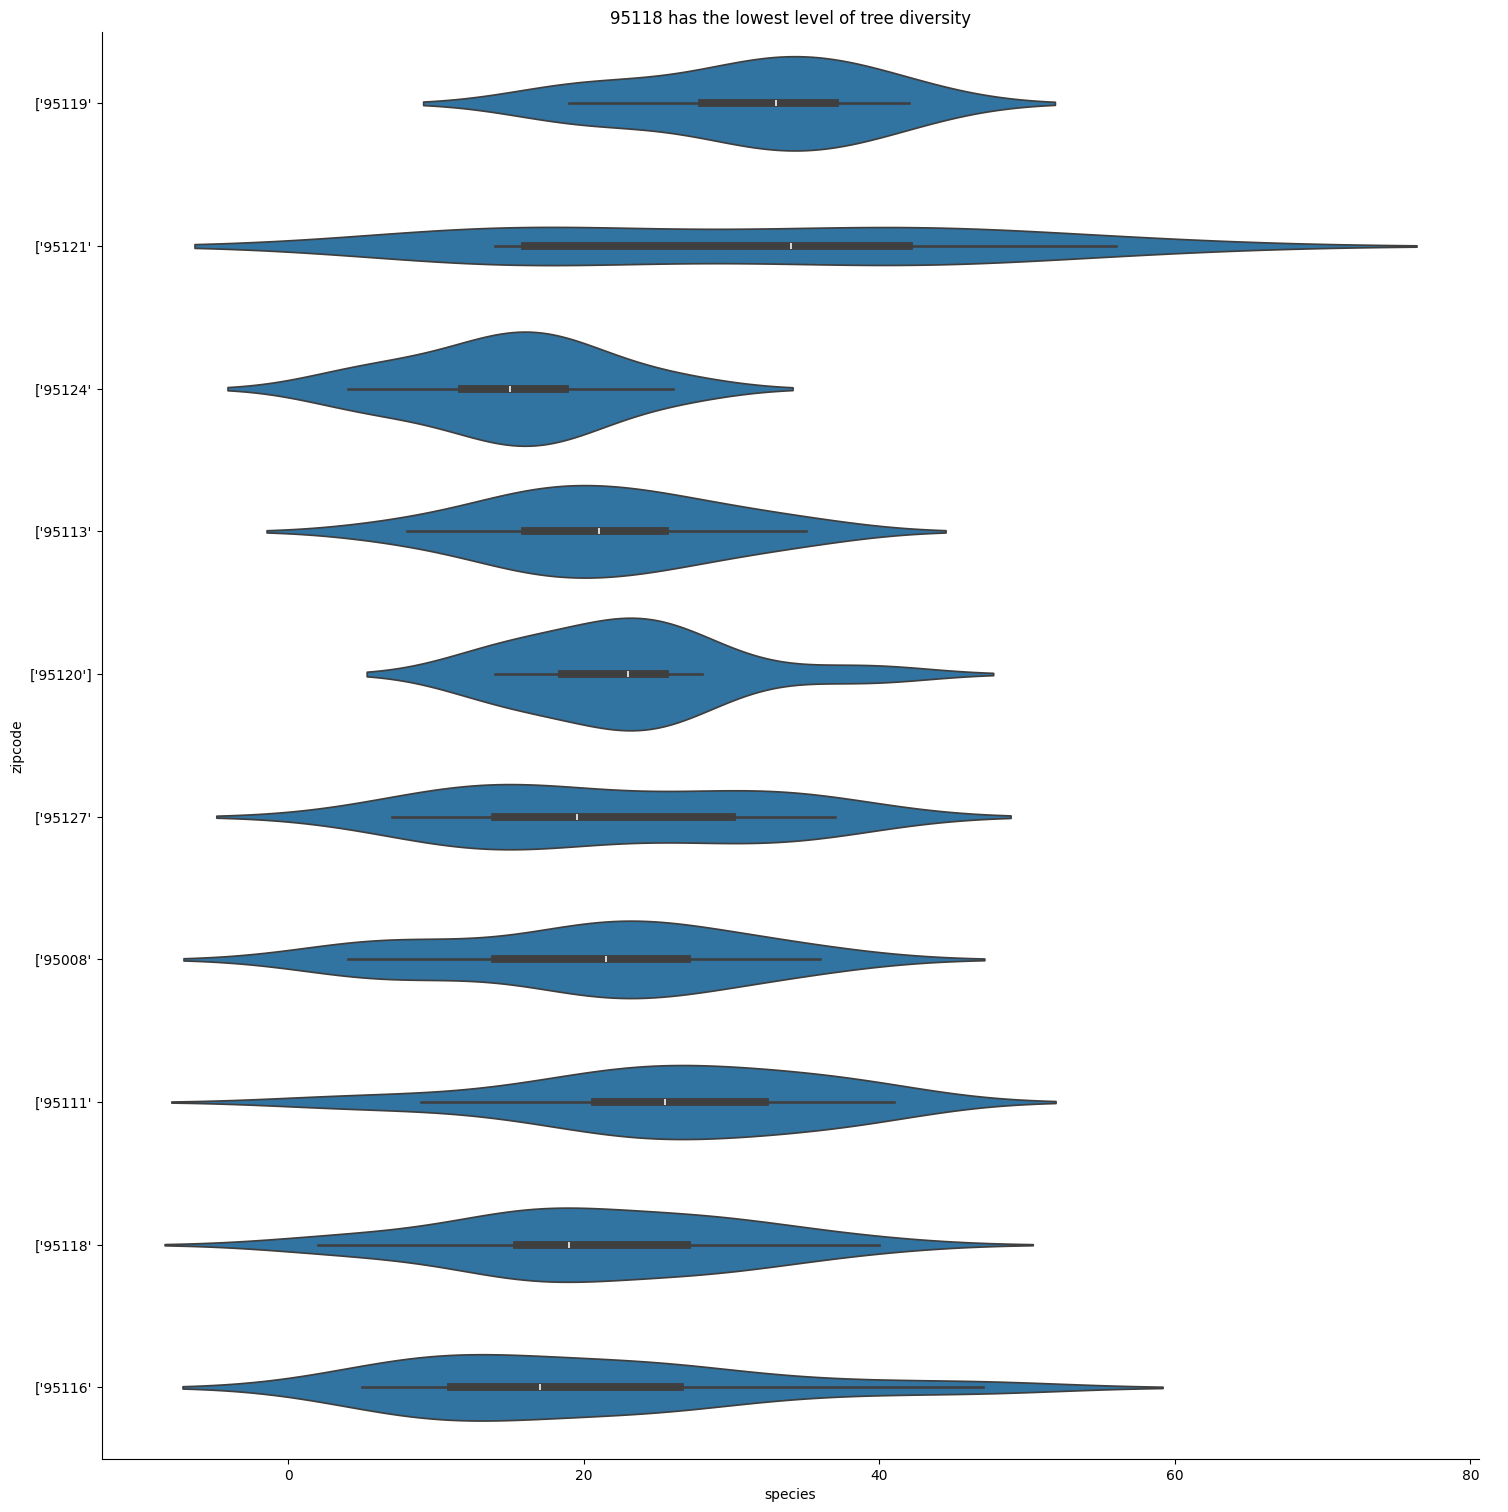

In [100]:
sns.catplot(
    data=q6_plot,
    x="species",
    y="zipcode",
    kind="violin",
    height = 15
    )

plt.title("95118 has the lowest level of tree diversity");
#im pretty sure the string formatting screwed everything over

# Question 7 (8 points)

Which San Jose neighborhood has the highest number of unique tree species?

(Use the Dataframe from Question 3 to answer)

In [105]:
yeet = q3['species'].max()
q3[q3['species'] == yeet]

,neighborhood,species
168,Norwood,72


# Question 8 (12 points):

Make a choropleth map of the number of unique tree species in each neighborhood.

Use the dataframe from question 3.

There's an example very close to this in lecture notes - scroll all the way down.

For your Choropleth:
*   `key_on="properties.NAME"`
*   `columns=['neighborhood', 'species']` <- You may need something similar? (make sure you match to your actual column names!)
* change the color scheme to "Greens"
* Include the neighborhood name on hover

For your folium Map:

*   `tiles="CartoDB Positron"` (we don't want greens to blend in with the green nature)

[Example Plot Here](https://docs.google.com/document/d/1wmSI3LmPn0cltxC3CAFpikNKx0vk144pJc6_6ARkL3s/edit#heading=h.lajjgsrqdjmj)





In [106]:
import folium
import geopy

In [115]:
neighborhood_choropleth = folium.Choropleth(geo_data="/content/Neighborhoods.geojson",
                                            highlight=True,
                                            overlay=True,
                                            data=q3,
                                            columns = ['neighborhood', 'species'],
                                            name="San Jose Neighborhoods",
                                            key_on="properties.NAME", # both work
                                            legend_name="Number of Species",

                                            fill_color='Greens'
                                            )
style_function = "font-size: 15px; font-weight: bold"

# Adding the neighborhood name
# Copied previous code, updated the variable "choropleth" to my "neighborhood_choropleth" variable name
# Then updated ["name"] to ["NAME"] to match the information in the geojson file
neighborhood_choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME'],style=style_function, labels=False)
)



In [112]:
map_center = (36.77, -121.466)
map_center

(36.77, -121.466)

In [116]:
sj_map = folium.Map(map_center, tiles="CartoDB Positron")

neighborhood_choropleth.add_to(sj_map)
sj_map

# Question 9 (12 Points):

A lot of people chose the Bay Area Housing Prices dataset to use for the ML Project. Several people said  something like "It's kind of hard to see, but..." while they were showing their map visualization.  

**For this question, please update this code to make it easier to see the trends in housing prices.**

**Use sns.relplot to plot Longitude vs Latitude.**

**Pseudocode or sketching could get up to 2/3 of the points for this problem.**

If you're not sure where to start, think about if you had a certain budget for buying a house. What might a figure look like to help you decide what area to look in?

Hint: you may want to read about the `hue_norm` parameter. But other parameters would could help as well.
https://seaborn.pydata.org/generated/seaborn.relplot.html

**Note: For the purposes of this exam, I am okay with legends being a bit of a mess with this plot, but please add a comment so I know you know what the issue is with the legend**.


In [166]:

#only look at housing that is less than 2,000,000 because who the hell is going to buy a house more than 2 million and call i affordable
housing2 = housing[housing['Price'] < 2000000]

#my idea is basically get the dataset, reduce the amount to something that people would actually consider affordable
#i would then try to put things in bins, say like a 250k range, 500k range, and so on untill 2 million range

housing3 = housing2[['Price', 'Longitude', 'Latitude']]
housing3['Price'] = housing3['Price'].apply(lambda x: 5000000 if x < 500000 else(1000000 if x < 1000000 else(1500000 if x < 1500000 else 2000000)))

housing3

<ipython-input-166-3dbdf865d5b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing3['Price'] = housing3['Price'].apply(lambda x: 5000000 if x < 500000 else(1000000 if x < 1000000 else(1500000 if x < 1500000 else 2000000)))


,Price,Longitude,Latitude
0,1500000,-122.304623,37.516781
1,2000000,-122.294079,37.521972
2,1000000,-122.273144,37.520233
3,2000000,-122.309437,37.520192
4,2000000,-122.291241,37.524280
...,...,...,...
7140,1000000,-121.547719,37.756444
7141,1000000,-121.547719,37.756444
7142,1000000,-121.537761,37.764721
7143,1000000,-121.547719,37.756444


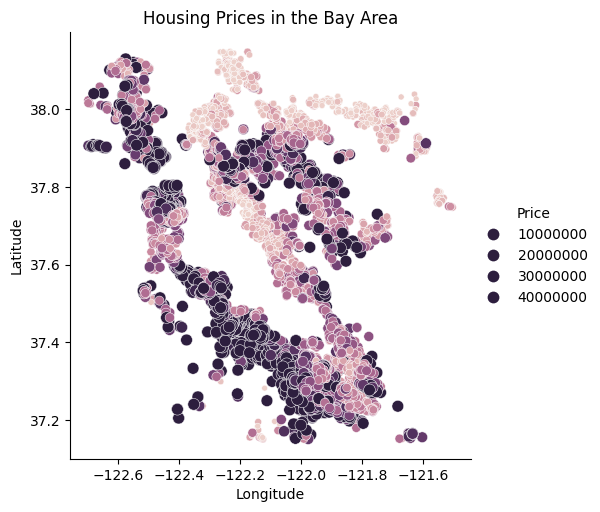

In [178]:
housing = pd.read_csv('https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv')

#only look at housing that is less than 2,000,000 because who the hell is going to buy a house more than 2 million and call i affordable
housing2 = housing[housing['Price'] < 2000000]

#my idea is basically get the dataset, reduce the amount to something that people would actually consider affordable
#i would then try to put things in bins, say like a 250k range, 500k range, and so on untill 2 million range

sns.relplot(housing,
            x="Longitude",
            y="Latitude",
            hue="Price",
            #ths the best now
            size = 'Price',
            size_norm = (500000,2000000),
            #palette = "pastel",
            #when using the pallete arg my legend would get insanely large, i dont know how to limit the amount


            hue_norm = (500000, 2000000)
            #this is the best i could do to handle having all of the data, housing2 and housing3 have less data in them to mak
            #it look more visible
            )

plt.title("Housing Prices in the Bay Area");

#i think i would also want to try and reverse the sizing/shading, I would want the areas that are cheaper to be darker
# so that they have more emphasis but now that Im looking at this plot, this aint too bad
#Im happy with it


In [120]:
housing

,Address,City,State,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,2412 Palmer Ave,Belmont,CA,94002,1459000,3,2.0,1360.0,5001.0,37.516781,-122.304623,63,33,77.9,33
1,1909 Hillman Ave,Belmont,CA,94002,1595000,4,2.0,2220.0,3999.0,37.521972,-122.294079,63,33,77.9,33
2,641 Waltermire St,Belmont,CA,94002,899999,2,1.0,840.0,4234.0,37.520233,-122.273144,63,33,77.9,33
3,2706 Sequoia Way,Belmont,CA,94002,1588000,3,2.0,1860.0,5210.0,37.520192,-122.309437,63,33,77.9,33
4,1568 Winding Way,Belmont,CA,94002,1999000,4,3.5,2900.0,16117.2,37.524280,-122.291241,63,33,77.9,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,The Davis,Mountain House,CA,95391,603990,5,3.0,2327.0,NaN,37.756444,-121.547719,120,125,65.3,120
7141,The Berkeley,Mountain House,CA,95391,619990,5,4.0,2410.0,NaN,37.756444,-121.547719,120,125,65.3,120
7142,Geranium,Mountain House,CA,95391,666340,5,4.0,2486.0,NaN,37.764721,-121.537761,120,125,65.3,120
7143,The Pepperdine,Mountain House,CA,95391,659990,5,4.0,2856.0,NaN,37.756444,-121.547719,120,125,65.3,120


#Bonus 1 (1 point):

Make a bar plot of the 5 neighborhoods with the highest number of unique tree species.

I would like the bar plot to:


*   Be titled
*   Be sorted high -> low
* Be all green (ideally a tree-like green)
  * https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
* Have the numerical labels on the bars
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html




Text(0.5, 1.0, 'neighborhoods with the highest number of unique tree species')

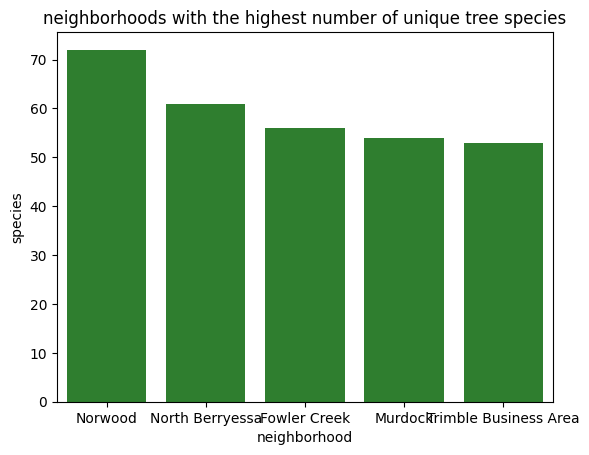

In [147]:
bonus1 = q3.nlargest(n = 5, columns = 'species').sort_values('species', ascending = False)
sns.barplot(data = bonus1, x = 'neighborhood', y = 'species', color = 'forestgreen')
plt.title("neighborhoods with the highest number of unique tree species")

# Bonus 2 (1 point):

Repeat the steps in Question 1, but using the full database of information, rather than a selection:
tree_tracker2.db


*   Calculate which tree occurs most frequently in each neighborhood
  * ignore "Vacant site", "Unknown" or other missing tree species
*   Plot a countplot of in how many neighborhoods each tree species is the most prevalent (restrict to top X or bottom X or a specific genus - up to you, but make sure I can read all of the labels you have on your plot)



In [179]:
#this reminded me to close the connection to the previes database
conn.close() # close the connection

In [181]:
conn = sqlite3.connect('/content/tree_tracker2.db')
data = pd.read_sql_query('Select * from tree;', conn)

data2 = pd.read_sql_query('Select * from neighborhood', conn)
data2.rename(columns = {'intid_neighborhood':'neighborhood_id'}, inplace = True)
data1

DatabaseError: Execution failed on sql 'Select * from tree;': database disk image is malformed

# Bonus 3 (1 point):

Using the larger dataset you got from Bonus 2 (or follow those instructions):


*   create a plot* showing how related each neighborhood and each tree species is to one another based on the frequency of counts of trees in each of the neighborhoods
  * *if you are unsure what plot type this would be, please raise your hand
   * ignore "Vacant site", "Unknown" or other missing tree species when calculating counts

